In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.metrics import r2_score, mean_absolute_error, mean_absolute_percentage_error
from joblib import load, dump

In [ ]:
df1 = pd.read_csv('House_Price.csv')
df1.head()

,Flat_Price,EMI_Starts,BHK,css-11nfaq3,Unnamed: 4,HOUSE_TYPE,Unnamed: 6,Unnamed: 7,Purpose,Location,Area_Type,Total_Sq.ft,Price_per_sq.ft,Owner_name,Owner_type
0,₹8.5 Cr,₹4.22 Lacs,6 BHK,6.0,BHK,Independent House,Independent,House,for sale in,"Ballygunge, Kolkata",Build Up Area,4200 sq.ft,₹20.24 K/sq.ft,Abhijit Chakraborty,Housing Expert
1,₹45.0 L,₹23.83 K,3 BHK,3.0,BHK,Independent House,Independent,House,for sale in,"Barrackpore, Kolkata",Build Up Area,1400 sq.ft,₹3.21 K/sq.ft,Virtual Reality,Housing Expert
2,₹1.35 Cr,₹67.02 K,3 BHK,3.0,BHK,Independent House,Independent,House,for sale in,"Santoshpur, Kolkata",Build Up Area,2500 sq.ft,₹5.40 K/sq.ft,AveNew Properties,Housing Expert
3,₹60.0 L,₹31.77 K,5 BHK,5.0,BHK,Independent House,Independent,House,for sale in,"Sarsuna, Kolkata",Build Up Area,1100 sq.ft,₹5.45 K/sq.ft,Ganapati Real Estate,Housing Expert
4,₹52.0 L,₹27.54 K,4 BHK,4.0,BHK,Independent House,Independent,House,for sale in,"Madhyamgram, Kolkata",Build Up Area,900 sq.ft,₹5.78 K/sq.ft,Third Eye Consulting,Housing Expert


In [ ]:
df1.drop(['css-11nfaq3', 'Unnamed: 4', 'Unnamed: 6', 'Unnamed: 7'], axis=1, inplace=True)
df1.head()

,Flat_Price,EMI_Starts,BHK,HOUSE_TYPE,Purpose,Location,Area_Type,Total_Sq.ft,Price_per_sq.ft,Owner_name,Owner_type
0,₹8.5 Cr,₹4.22 Lacs,6 BHK,Independent House,for sale in,"Ballygunge, Kolkata",Build Up Area,4200 sq.ft,₹20.24 K/sq.ft,Abhijit Chakraborty,Housing Expert
1,₹45.0 L,₹23.83 K,3 BHK,Independent House,for sale in,"Barrackpore, Kolkata",Build Up Area,1400 sq.ft,₹3.21 K/sq.ft,Virtual Reality,Housing Expert
2,₹1.35 Cr,₹67.02 K,3 BHK,Independent House,for sale in,"Santoshpur, Kolkata",Build Up Area,2500 sq.ft,₹5.40 K/sq.ft,AveNew Properties,Housing Expert
3,₹60.0 L,₹31.77 K,5 BHK,Independent House,for sale in,"Sarsuna, Kolkata",Build Up Area,1100 sq.ft,₹5.45 K/sq.ft,Ganapati Real Estate,Housing Expert
4,₹52.0 L,₹27.54 K,4 BHK,Independent House,for sale in,"Madhyamgram, Kolkata",Build Up Area,900 sq.ft,₹5.78 K/sq.ft,Third Eye Consulting,Housing Expert


In [ ]:
df1['HOUSE_TYPE'].unique()

array(['Independent House', ' '], dtype=object)

In [ ]:
df1['Area_Type'].unique()

array(['Build Up Area', 'Possession Starts'], dtype=object)

In [ ]:
df1['Location'].unique()

array(['Ballygunge, Kolkata', 'Barrackpore, Kolkata',
       'Santoshpur, Kolkata', 'Sarsuna, Kolkata', 'Madhyamgram, Kolkata',
       'Thakurpukur, Kolkata', 'Rajpur, Kolkata',
       'North Dum Dum, Kolkata', 'Dhakuria, Kolkata',
       'Shyambazar, Kolkata', 'Nazirabad, Kolkata', 'Joka, Kolkata',
       'Kasba, Kolkata', 'Barisha, Kolkata', 'Behala, Kolkata',
       'Taratala, Kolkata', 'Jodhpur Park, Kolkata',
       'Salt Lake City, Kolkata', 'New Town, Kolkata',
       'Mohispota, Kolkata', 'Maheshtala, Kolkata', 'Naihati, Kolkata',
       'Birati, Kolkata', 'Amtala, Kolkata', 'Gariahat, Kolkata',
       'New Barrakpur, Kolkata', 'Rajpur Sonarpur, Kolkata',
       'Khardah, Kolkata', 'Belghoria, Kolkata', 'Sodepur, Kolkata',
       'Baghbazar, Kolkata', 'Baghajatin, Kolkata', 'Nimta, Kolkata',
       'Lake Gardens, Kolkata', 'Khidirpur, Kolkata',
       'Kolutolla, Kolkata', 'Baguiati, Kolkata',
       'Diamond Harbour, Kolkata', 'Bantala, Kolkata',
       'Tollygunge, Kolkata', 

In [ ]:
df1.drop(['Area_Type', 'HOUSE_TYPE', 'Purpose', 'Owner_name', 'Owner_type'], axis=1, inplace=True)
df1.head()

,Flat_Price,EMI_Starts,BHK,Location,Total_Sq.ft,Price_per_sq.ft
0,₹8.5 Cr,₹4.22 Lacs,6 BHK,"Ballygunge, Kolkata",4200 sq.ft,₹20.24 K/sq.ft
1,₹45.0 L,₹23.83 K,3 BHK,"Barrackpore, Kolkata",1400 sq.ft,₹3.21 K/sq.ft
2,₹1.35 Cr,₹67.02 K,3 BHK,"Santoshpur, Kolkata",2500 sq.ft,₹5.40 K/sq.ft
3,₹60.0 L,₹31.77 K,5 BHK,"Sarsuna, Kolkata",1100 sq.ft,₹5.45 K/sq.ft
4,₹52.0 L,₹27.54 K,4 BHK,"Madhyamgram, Kolkata",900 sq.ft,₹5.78 K/sq.ft


In [ ]:
df2 = df1.copy()

In [ ]:
# Triming the columns
df2['Price_per_sq.ft'] = df2['Price_per_sq.ft'].apply(lambda x: x.rstrip("/sq.ft"))
df2['Price_per_sq.ft'] = df2['Price_per_sq.ft'].apply(lambda x: x.lstrip('₹'))
df2.head()

,Flat_Price,EMI_Starts,BHK,Location,Total_Sq.ft,Price_per_sq.ft
0,₹8.5 Cr,₹4.22 Lacs,6 BHK,"Ballygunge, Kolkata",4200 sq.ft,20.24 K
1,₹45.0 L,₹23.83 K,3 BHK,"Barrackpore, Kolkata",1400 sq.ft,3.21 K
2,₹1.35 Cr,₹67.02 K,3 BHK,"Santoshpur, Kolkata",2500 sq.ft,5.40 K
3,₹60.0 L,₹31.77 K,5 BHK,"Sarsuna, Kolkata",1100 sq.ft,5.45 K
4,₹52.0 L,₹27.54 K,4 BHK,"Madhyamgram, Kolkata",900 sq.ft,5.78 K


In [ ]:
df2['EMI_Starts'] = df2['EMI_Starts'].apply(lambda x: x.lstrip('₹'))
df2['Flat_Price'] = df2['Flat_Price'].apply(lambda x: x.lstrip('₹'))
df2.head()

,Flat_Price,EMI_Starts,BHK,Location,Total_Sq.ft,Price_per_sq.ft
0,8.5 Cr,4.22 Lacs,6 BHK,"Ballygunge, Kolkata",4200 sq.ft,20.24 K
1,45.0 L,23.83 K,3 BHK,"Barrackpore, Kolkata",1400 sq.ft,3.21 K
2,1.35 Cr,67.02 K,3 BHK,"Santoshpur, Kolkata",2500 sq.ft,5.40 K
3,60.0 L,31.77 K,5 BHK,"Sarsuna, Kolkata",1100 sq.ft,5.45 K
4,52.0 L,27.54 K,4 BHK,"Madhyamgram, Kolkata",900 sq.ft,5.78 K


In [ ]:
df2['Location'].str.split(',', 1, expand=True)[1].unique()

array([' Kolkata', nan, None, ''], dtype=object)

In [ ]:
df2['Location'] = df2['Location'].fillna('None')

In [ ]:
df2.isna().sum()

Flat_Price         0
EMI_Starts         0
BHK                0
Location           0
Total_Sq.ft        0
Price_per_sq.ft    0
dtype: int64

In [ ]:
df2['Region'] = df2['Location'].apply(lambda x: x.split(', ')[0])
df2

,Flat_Price,EMI_Starts,BHK,Location,Total_Sq.ft,Price_per_sq.ft,Region
0,8.5 Cr,4.22 Lacs,6 BHK,"Ballygunge, Kolkata",4200 sq.ft,20.24 K,Ballygunge
1,45.0 L,23.83 K,3 BHK,"Barrackpore, Kolkata",1400 sq.ft,3.21 K,Barrackpore
2,1.35 Cr,67.02 K,3 BHK,"Santoshpur, Kolkata",2500 sq.ft,5.40 K,Santoshpur
3,60.0 L,31.77 K,5 BHK,"Sarsuna, Kolkata",1100 sq.ft,5.45 K,Sarsuna
4,52.0 L,27.54 K,4 BHK,"Madhyamgram, Kolkata",900 sq.ft,5.78 K,Madhyamgram
...,...,...,...,...,...,...,...
3963,13.0 L,6.88 K,2 BHK,"Picnic Garden, Kolkata",1500 sq.ft,866,Picnic Garden
3964,1.5 Cr,74.47 K,8 BHK,"Rajpur Sonarpur, Kolkata",2560 sq.ft,5.86 K,Rajpur Sonarpur
3965,50.0 L,26.48 K,5 BHK,"Amtala, Kolkata",1900 sq.ft,2.63 K,Amtala
3966,1.1 Cr,54.61 K,5 BHK,"Tollygunge, Kolkata",2600 sq.ft,4.23 K,Tollygunge


In [ ]:
df2.drop(['Location'], axis=1, inplace=True)
df2

,Flat_Price,EMI_Starts,BHK,Total_Sq.ft,Price_per_sq.ft,Region
0,8.5 Cr,4.22 Lacs,6 BHK,4200 sq.ft,20.24 K,Ballygunge
1,45.0 L,23.83 K,3 BHK,1400 sq.ft,3.21 K,Barrackpore
2,1.35 Cr,67.02 K,3 BHK,2500 sq.ft,5.40 K,Santoshpur
3,60.0 L,31.77 K,5 BHK,1100 sq.ft,5.45 K,Sarsuna
4,52.0 L,27.54 K,4 BHK,900 sq.ft,5.78 K,Madhyamgram
...,...,...,...,...,...,...
3963,13.0 L,6.88 K,2 BHK,1500 sq.ft,866,Picnic Garden
3964,1.5 Cr,74.47 K,8 BHK,2560 sq.ft,5.86 K,Rajpur Sonarpur
3965,50.0 L,26.48 K,5 BHK,1900 sq.ft,2.63 K,Amtala
3966,1.1 Cr,54.61 K,5 BHK,2600 sq.ft,4.23 K,Tollygunge


In [ ]:
df2[(df2['Flat_Price'].str.split(' ', 1, expand=True)[1] == 'L - 1.03 Cr')]

,Flat_Price,EMI_Starts,BHK,Total_Sq.ft,Price_per_sq.ft,Region
148,99.83 L - 1.03 Cr,49.56 K,,"Jan, 2024",4.50 K,None
168,99.83 L - 1.03 Cr,49.56 K,,"Jan, 2024",4.50 K,None


In [ ]:
df2.drop([148, 168], axis=0, inplace=True)

In [ ]:
def convert_to_integer(row_value):
  splitted_val = row_value.split(" ")
  amt = float(splitted_val[0])
  if len(splitted_val) == 2:
    unit = splitted_val[1]
    if unit == 'K':
      return 1000 * float(amt)
    elif unit == 'L' or unit == 'Lacs':
      return 100000 * float(amt)
    elif unit == 'Cr':
      return 10000000 * float(amt)
  else:
    return amt

In [ ]:
df2['EMI_Starts'] = df2.apply(lambda x: convert_to_integer(x['EMI_Starts']), axis=1)
df2['Flat_Price'] = df2['Flat_Price'].apply(convert_to_integer)
df2['Price_per_sq.ft'] = df2['Price_per_sq.ft'].apply(convert_to_integer)
df2['Total_Sq.ft'] = df2['Total_Sq.ft'].apply(lambda x: float(x.split(' ')[0]))
df2

,Flat_Price,EMI_Starts,BHK,Total_Sq.ft,Price_per_sq.ft,Region
0,85000000.0,422000.0,6 BHK,4200.0,20240.0,Ballygunge
1,4500000.0,23830.0,3 BHK,1400.0,3210.0,Barrackpore
2,13500000.0,67020.0,3 BHK,2500.0,5400.0,Santoshpur
3,6000000.0,31770.0,5 BHK,1100.0,5450.0,Sarsuna
4,5200000.0,27540.0,4 BHK,900.0,5780.0,Madhyamgram
...,...,...,...,...,...,...
3963,1300000.0,6880.0,2 BHK,1500.0,866.0,Picnic Garden
3964,15000000.0,74470.0,8 BHK,2560.0,5860.0,Rajpur Sonarpur
3965,5000000.0,26480.0,5 BHK,1900.0,2630.0,Amtala
3966,11000000.0,54610.0,5 BHK,2600.0,4230.0,Tollygunge


In [ ]:
df2['BHK'] = df2['BHK'].apply(lambda x: float(x.split(' ')[0]))
df2.head()

,Flat_Price,EMI_Starts,BHK,Total_Sq.ft,Price_per_sq.ft,Region
0,85000000.0,422000.0,6.0,4200.0,20240.0,Ballygunge
1,4500000.0,23830.0,3.0,1400.0,3210.0,Barrackpore
2,13500000.0,67020.0,3.0,2500.0,5400.0,Santoshpur
3,6000000.0,31770.0,5.0,1100.0,5450.0,Sarsuna
4,5200000.0,27540.0,4.0,900.0,5780.0,Madhyamgram


In [ ]:
target = df2['Flat_Price']
df3 = df2.copy()

## Encoding categorical columns

In [ ]:
label_encoder = preprocessing.LabelEncoder()

In [ ]:
df3['Region'] = label_encoder.fit_transform(df3['Region'])
region_mappings_le = {index: label for index, label in enumerate(label_encoder.classes_)}
df3

,Flat_Price,EMI_Starts,BHK,Total_Sq.ft,Price_per_sq.ft,Region
0,85000000.0,422000.0,6.0,4200.0,20240.0,19
1,4500000.0,23830.0,3.0,1400.0,3210.0,29
2,13500000.0,67020.0,3.0,2500.0,5400.0,173
3,6000000.0,31770.0,5.0,1100.0,5450.0,175
4,5200000.0,27540.0,4.0,900.0,5780.0,121
...,...,...,...,...,...,...
3963,1300000.0,6880.0,2.0,1500.0,866.0,157
3964,15000000.0,74470.0,8.0,2560.0,5860.0,166
3965,5000000.0,26480.0,5.0,1900.0,2630.0,5
3966,11000000.0,54610.0,5.0,2600.0,4230.0,194


In [ ]:
region_mappings_le

{0: 'Abdalpur',
 1: 'Adarsha Nagar',
 2: 'Agarpara',
 3: 'Airport',
 4: 'Alipore',
 5: 'Amtala',
 6: 'Ariadaha',
 7: 'Ashokgarh',
 8: 'Aurobindo Park',
 9: 'Badartala',
 10: 'Baghajatin',
 11: 'Baghbazar',
 12: 'Bagmari',
 13: 'Bagnan',
 14: 'Bagpota',
 15: 'Baguiati',
 16: 'Baguihati',
 17: 'Baishnabghata Patuli Township,',
 18: 'Baithakkhana',
 19: 'Ballygunge',
 20: 'Bamangachhi',
 21: 'Bamunpara',
 22: 'Bangaon',
 23: 'Bansdroni',
 24: 'Bantala',
 25: 'Barabazar Market',
 26: 'Baranagar',
 27: 'Barasat',
 28: 'Barisha',
 29: 'Barrackpore',
 30: 'Baruipur',
 31: 'Baruipur P',
 32: 'Basirhat',
 33: 'Behala',
 34: 'Belgachia',
 35: 'Belghoria',
 36: 'Beliaghata',
 37: 'Beniapukur',
 38: 'Beniatola',
 39: 'Berunanpukhuria',
 40: 'Bhatenda',
 41: 'Bhatpara',
 42: 'Bhowanipore',
 43: 'Bijoygarh',
 44: 'Bira',
 45: 'Birati',
 46: 'Bishnupur',
 47: 'Bow Barracks',
 48: 'Bow Bazaar',
 49: 'Bramhapur',
 50: 'Budge Budge',
 51: 'Champahati',
 52: 'Chandpara',
 53: 'Chinar Park',
 54: 'Chitpur

In [ ]:
df4 = df2.copy()

In [ ]:
df4

,Flat_Price,EMI_Starts,BHK,Total_Sq.ft,Price_per_sq.ft,Region
0,85000000.0,422000.0,6.0,4200.0,20240.0,Ballygunge
1,4500000.0,23830.0,3.0,1400.0,3210.0,Barrackpore
2,13500000.0,67020.0,3.0,2500.0,5400.0,Santoshpur
3,6000000.0,31770.0,5.0,1100.0,5450.0,Sarsuna
4,5200000.0,27540.0,4.0,900.0,5780.0,Madhyamgram
...,...,...,...,...,...,...
3963,1300000.0,6880.0,2.0,1500.0,866.0,Picnic Garden
3964,15000000.0,74470.0,8.0,2560.0,5860.0,Rajpur Sonarpur
3965,5000000.0,26480.0,5.0,1900.0,2630.0,Amtala
3966,11000000.0,54610.0,5.0,2600.0,4230.0,Tollygunge


## Feature selection

<Axes: >

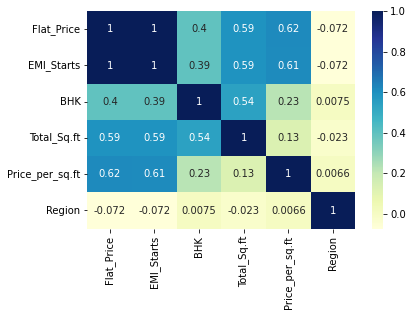

In [ ]:
sns.heatmap(df3.corr(), cmap="YlGnBu", annot=True)

In [ ]:
df5 = df3.drop('EMI_Starts', axis=1)
df5.head()

,Flat_Price,BHK,Total_Sq.ft,Price_per_sq.ft,Region
0,85000000.0,6.0,4200.0,20240.0,19
1,4500000.0,3.0,1400.0,3210.0,29
2,13500000.0,3.0,2500.0,5400.0,173
3,6000000.0,5.0,1100.0,5450.0,175
4,5200000.0,4.0,900.0,5780.0,121


## Removing outliers

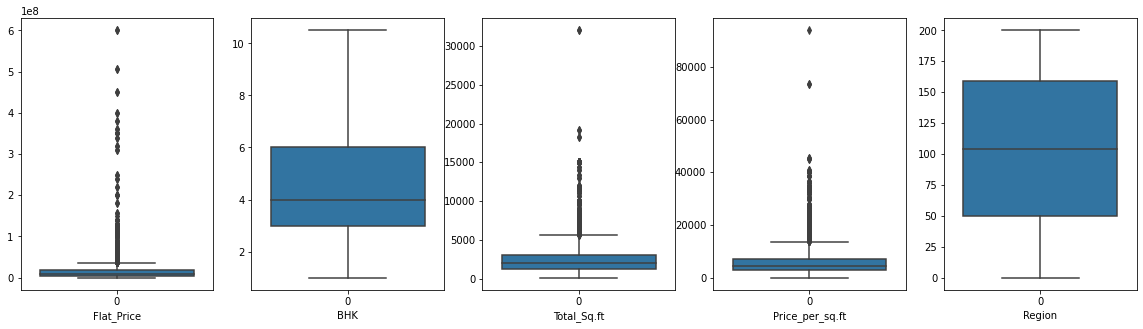

In [ ]:
fig, ax = plt.subplots(1, 5, figsize=(20, 5))

for col, i in zip(df5.select_dtypes(np.number).columns, ax.flatten()):
  i.set_xlabel(col)
  sns.boxplot(data=df5[col], ax=i)

In [ ]:
df5.shape

(3966, 5)

In [ ]:
df5.drop(df5[df5['Flat_Price'] > 1.50*10000000].index, inplace=True)
df5.drop(df5[df5['BHK'] > 8].index, inplace=True)
df5.drop(df5[df5['Total_Sq.ft'] > 3500].index, inplace=True)
df5.drop(df5[df5['Price_per_sq.ft'] >= 8500].index, inplace=True)
df5.shape

(2411, 5)

In [ ]:
df5.describe()

,Flat_Price,BHK,Total_Sq.ft,Price_per_sq.ft,Region
count,2.411000e+03,2411.000000,2411.000000,2411.000000,2411.000000
mean,6.339897e+06,3.661551,1665.318540,3966.788055,101.161344
std,3.377077e+06,1.581182,741.651304,1621.455922,57.773812
min,1.350000e+05,1.000000,200.000000,156.000000,0.000000
25%,3.800000e+06,2.000000,1100.000000,2780.000000,45.000000
50%,5.900000e+06,3.000000,1500.000000,3750.000000,101.000000
75%,8.500000e+06,5.000000,2160.000000,5000.000000,157.000000
max,1.500000e+07,8.000000,3500.000000,8460.000000,200.000000


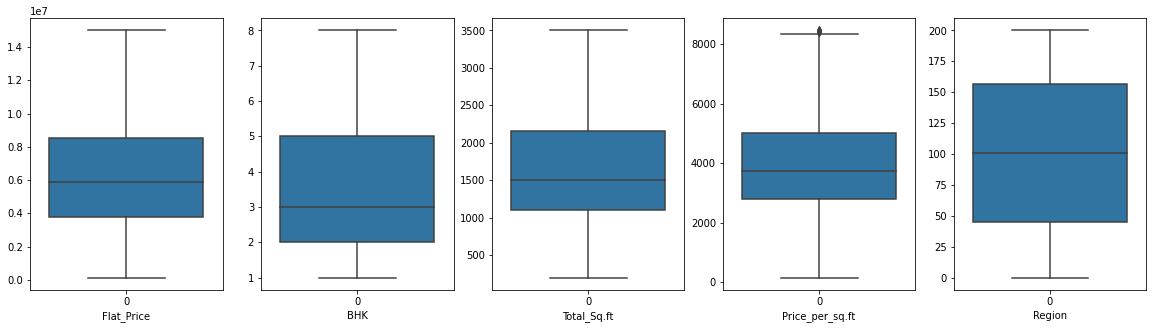

In [ ]:
fig, ax = plt.subplots(1, 5, figsize=(20, 5))
# plt.title('After removinf outliers')
for col, i in zip(df5.columns, ax.flatten()):
  i.set_xlabel(col)
  sns.boxplot(data=df5[col].values, ax=i)
# df5['Flat_Price'].unique() 

In [ ]:
df5.head()

,Flat_Price,BHK,Total_Sq.ft,Price_per_sq.ft,Region
1,4500000.0,3.0,1400.0,3210.0,29
2,13500000.0,3.0,2500.0,5400.0,173
3,6000000.0,5.0,1100.0,5450.0,175
4,5200000.0,4.0,900.0,5780.0,121
5,3200000.0,3.0,1200.0,2670.0,192


## Scaling

In [ ]:
scaler = StandardScaler()

In [ ]:
X = df5.drop('Flat_Price', axis=1)
y = df5['Flat_Price']
X.head()

,BHK,Total_Sq.ft,Price_per_sq.ft,Region
1,3.0,1400.0,3210.0,29
2,3.0,2500.0,5400.0,173
3,5.0,1100.0,5450.0,175
4,4.0,900.0,5780.0,121
5,3.0,1200.0,2670.0,192


In [ ]:
X.to_csv('features.csv', index=False)

In [ ]:
newdf = pd.read_csv('features.csv', index_col=False)
newdf.head()

,BHK,Total_Sq.ft,Price_per_sq.ft,Region
0,3.0,1400.0,3210.0,29
1,3.0,2500.0,5400.0,173
2,5.0,1100.0,5450.0,175
3,4.0,900.0,5780.0,121
4,3.0,1200.0,2670.0,192


<ipython-input-37-346b42b42da6>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X[col], ax=i, kde=True)
<ipython-input-37-346b42b42da6>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X[col], ax=i, kde=True)
<ipython-input-37-346b42b42da6>:4: UserWarning: 

`distplot` is a deprecated function 

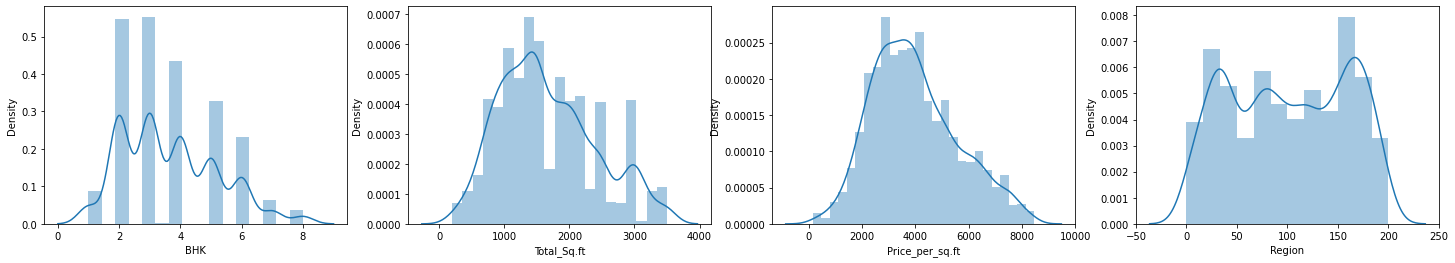

In [ ]:
fig, ax = plt.subplots(1, 4, figsize=(25, 4))
for col, i in zip(X.select_dtypes(np.number).columns, ax.flatten()):
  i.set_xlabel(col)
  sns.distplot(X[col], ax=i, kde=True)

In [ ]:
X = pd.DataFrame(data=scaler.fit_transform(X), columns=['BHK', 'Total_Sq.ft', 'Price_per_sq.ft', 'Region'])
X.head()

,BHK,Total_Sq.ft,Price_per_sq.ft,Region
0,-0.418477,-0.357814,-0.466830,-1.249291
1,-0.418477,1.125670,0.884088,1.243705
2,0.846662,-0.762401,0.914931,1.278330
3,0.214092,-1.032126,1.118494,0.343456
4,-0.418477,-0.627539,-0.799934,1.572642


<ipython-input-39-346b42b42da6>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X[col], ax=i, kde=True)
<ipython-input-39-346b42b42da6>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X[col], ax=i, kde=True)
<ipython-input-39-346b42b42da6>:4: UserWarning: 

`distplot` is a deprecated function 

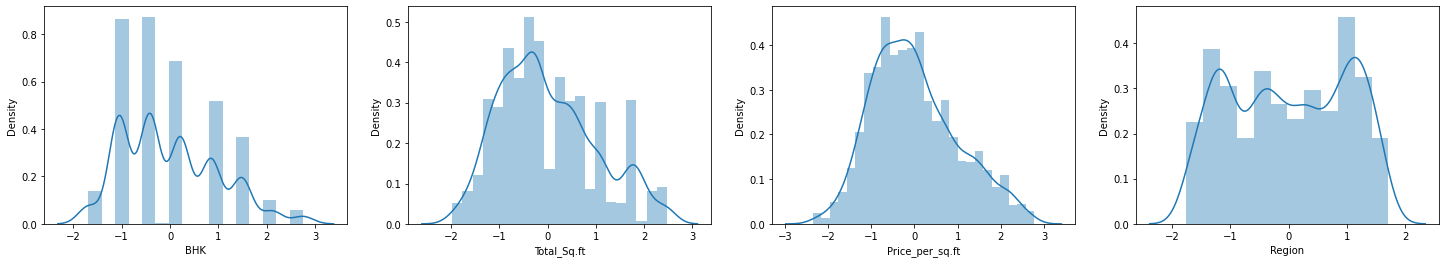

In [ ]:
fig, ax = plt.subplots(1, 4, figsize=(25, 4))
for col, i in zip(X.select_dtypes(np.number).columns, ax.flatten()):
  i.set_xlabel(col)
  sns.distplot(X[col], ax=i, kde=True)

## Baseline model

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=10)

In [ ]:
lr = LinearRegression()

In [ ]:
lr.fit(X_train, y_train)

LinearRegression()

In [ ]:
# prediction = np.exp(lr.predict(X_test))
prediction = lr.predict(X_test)

In [ ]:
# r2 = r2_score(np.exp(y_test), prediction)
# mae = mean_absolute_error(np.exp(y_test), prediction)
# mape = mean_absolute_percentage_error(np.exp(y_test), prediction)

r2 = r2_score(y_test, prediction)
mae = mean_absolute_error(y_test, prediction)
mape = mean_absolute_percentage_error(y_test, prediction)

In [ ]:
print("R2 : ", r2)
print("MAE : ", mae)
print("MAPE : ", mape)

R2 :  0.9156565591336163
MAE :  711791.9114491852
MAPE :  0.16630849753300275


In [ ]:
def get_key(val):
    for key, value in region_mappings_le.items():
        if val == value:
            return key
 
    return "key doesn't exist"

In [ ]:
def predict_price(BHK, Total_Sq_ft, Price_per_sq_ft, Region):
  val = get_key(Region)
  x = np.zeros(len(X.columns))
  x[0] = BHK
  x[1] = Total_Sq_ft
  x[2] = Price_per_sq_ft
  x[3] = val
  # x = np.log1p(x)
  x_scaled = scaler.transform([x])
  # return x.shape
  return (lr.predict(x_scaled)[0])

In [ ]:
predict_price(4.0, 1581.0, 7000.0, 'Joka')

/usr/local/lib/python3.9/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


10566874.952708032

In [ ]:
predict_price(4.0, 2500.0, 4400.0, 'Kalyani')

/usr/local/lib/python3.9/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


9826691.861478608

## Model compare

In [ ]:
models = [LinearRegression(),
          Ridge(alpha=1.0), 
          Lasso(),
          DecisionTreeRegressor(), 
          KNeighborsRegressor(),
          SVR(),
          XGBRegressor(n_estimators=1000, learning_rate=0.01)
         ]
model_names = ['Linear Regression', 
               'Ridge',
               'Lasso',
    'Decision Tree', 
    'KNeighbors Regression',
    'SVR',
    'XGB'
  ]

In [ ]:
performances = {}
kf = KFold(n_splits=10)
for model, name in zip(models, model_names):
  model.fit(X_train, y_train)
  results = cross_val_score(model, X_train, y_train, scoring='neg_mean_absolute_percentage_error', cv=kf)
  prediction = (model.predict(X_test))
  r2 = r2_score((y_test), prediction)
  mape = mean_absolute_percentage_error((y_test), prediction)
  performances[name] = [(np.mean(-results)), r2, mape]

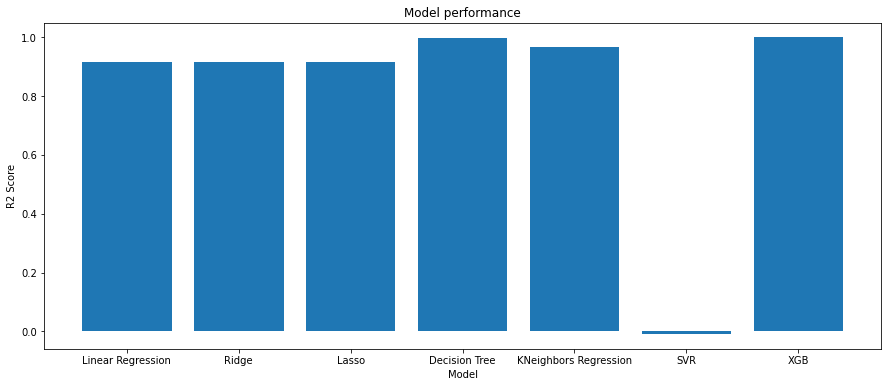

In [ ]:
plt.figure(figsize=(15, 6))
plt.bar(performances.keys(), [p[1] for p in performances.values()])
plt.xlabel('Model')
plt.ylabel('R2 Score')
plt.title('Model performance')
plt.show()

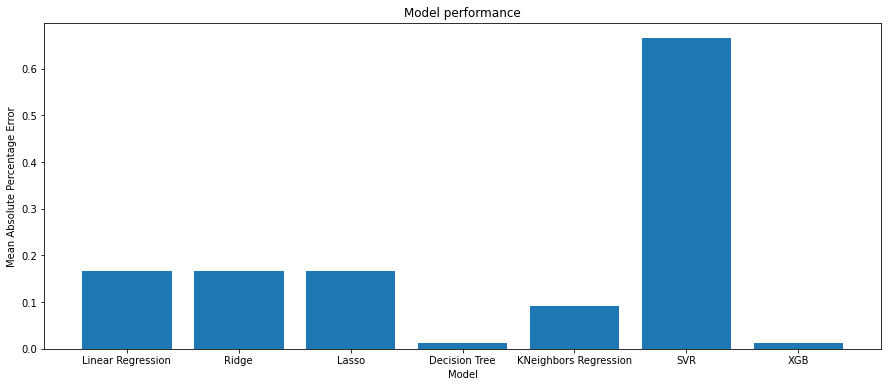

In [ ]:
plt.figure(figsize=(15, 6))
plt.bar(performances.keys(), [p[2] for p in performances.values()])
plt.xlabel('Model')
plt.ylabel('Mean Absolute Percentage Error')
plt.title('Model performance')
plt.show()

In [ ]:
xgb = XGBRegressor(n_estimators=1000, learning_rate=0.01)
xgb.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.01, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=1000, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

In [ ]:
prediction = xgb.predict(X_test)
print('MAPE : ', mean_absolute_percentage_error(y_test, prediction))
print('R2 : ', r2_score(y_test, prediction))
print('MAE : ', mean_absolute_error(y_test, prediction))
results = cross_val_score(xgb, X_train, y_train, scoring='neg_mean_absolute_percentage_error', cv=kf)
print('cross val score : ', np.mean(-results))

MAPE :  0.012091712302099636
R2 :  0.9990475619024936
MAE :  59824.84970649171
cross val score :  0.014832139002595276


In [ ]:
region_mappings_le

{0: 'Abdalpur',
 1: 'Adarsha Nagar',
 2: 'Agarpara',
 3: 'Airport',
 4: 'Alipore',
 5: 'Amtala',
 6: 'Ariadaha',
 7: 'Ashokgarh',
 8: 'Aurobindo Park',
 9: 'Badartala',
 10: 'Baghajatin',
 11: 'Baghbazar',
 12: 'Bagmari',
 13: 'Bagnan',
 14: 'Bagpota',
 15: 'Baguiati',
 16: 'Baguihati',
 17: 'Baishnabghata Patuli Township,',
 18: 'Baithakkhana',
 19: 'Ballygunge',
 20: 'Bamangachhi',
 21: 'Bamunpara',
 22: 'Bangaon',
 23: 'Bansdroni',
 24: 'Bantala',
 25: 'Barabazar Market',
 26: 'Baranagar',
 27: 'Barasat',
 28: 'Barisha',
 29: 'Barrackpore',
 30: 'Baruipur',
 31: 'Baruipur P',
 32: 'Basirhat',
 33: 'Behala',
 34: 'Belgachia',
 35: 'Belghoria',
 36: 'Beliaghata',
 37: 'Beniapukur',
 38: 'Beniatola',
 39: 'Berunanpukhuria',
 40: 'Bhatenda',
 41: 'Bhatpara',
 42: 'Bhowanipore',
 43: 'Bijoygarh',
 44: 'Bira',
 45: 'Birati',
 46: 'Bishnupur',
 47: 'Bow Barracks',
 48: 'Bow Bazaar',
 49: 'Bramhapur',
 50: 'Budge Budge',
 51: 'Champahati',
 52: 'Chandpara',
 53: 'Chinar Park',
 54: 'Chitpur

In [ ]:
def get_key(val):
    for key, value in region_mappings_le.items():
        if val == value:
            return key
 
    return "key doesn't exist"

In [ ]:
def predict_price(BHK, Total_Sq_ft, Price_per_sq_ft, Region):
  val = get_key(Region)
  x = np.zeros(len(X.columns))
  x[0] = BHK
  x[1] = Total_Sq_ft
  x[2] = Price_per_sq_ft
  x[3] = val
  x_scaled = scaler.transform([x])
  # return x.shape
  return xgb.predict(x_scaled)[0]

In [ ]:
predict_price(6.0, 1408.0, 6889.0, 'Kolkata')

/usr/local/lib/python3.9/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


9465784.0

In [ ]:
predict_price(4.0, 1581.0, 7000.0, 'Joka')

/usr/local/lib/python3.9/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


11163463.0

In [ ]:
predict_price(4.0, 2500.0, 4400.0, 'Kalyani')

/usr/local/lib/python3.9/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


11233770.0

In [ ]:
import pickle
with open('West_Bengal_House_Price_Prediction_Mode.pickle', 'wb') as f:
  pickle.dump(xgb, f)

In [ ]:
dump(lr, 'lr_model.joblib')

['lr_model.joblib']

In [ ]:
model_in = load('xgb_model.joblib')

In [ ]:
model_in

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.01, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=1000, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)